In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pkl

<h1>Load Dataset and feature Matrix</h1>

In [2]:
# images = pd.read_csv('../../Datasets/Assignment 3/Ages.csv')
images = pd.read_csv('../../Assignment 1/task1/Data.csv')

In [3]:
# file_name = '../../Datasets/Assignment 3/Compressed_images/Compressed_data_age_1'
file_name = '../../Assignment 1/task1/Compressed_data_1'
with open(file_name, 'rb') as handle:
    feature_matrix = pkl.load(handle)
print(feature_matrix.shape)

(61, 3072)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(feature_matrix,images['Identity'],stratify=images['Identity'],test_size=0.2)

In [5]:
X_train.shape,X_test.shape

((48, 3072), (13, 3072))

In [6]:
lg_auto = LogisticRegression(multi_class='multinomial',random_state=32)
lg_ovr = LogisticRegression(multi_class='ovr',random_state=32)

In [7]:
lg_auto.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=32)

In [8]:
lg_ovr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=32)

In [9]:
y_pred_auto = lg_auto.predict(X_test)
y_pred_ovr = lg_ovr.predict(X_test)

Logistic regression Multinomial
Accuracy: 1.0
Classwise Classification Report: 
              precision    recall  f1-score   support

       haziq       1.00      1.00      1.00         7
    sulaiman       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Confusion Matrix: 


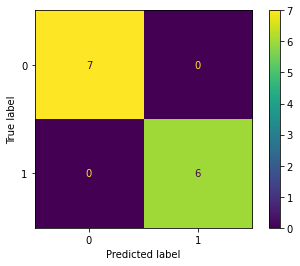

In [10]:
print("Logistic regression Multinomial")
print(f"Accuracy: {accuracy_score(y_test, y_pred_auto)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred_auto)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred_auto)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

Logistic regression ovr
Accuracy: 1.0
Classwise Classification Report: 
              precision    recall  f1-score   support

       haziq       1.00      1.00      1.00         7
    sulaiman       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Confusion Matrix: 


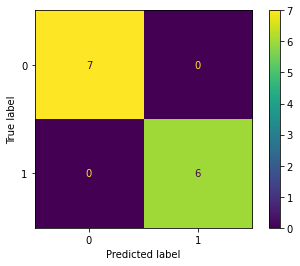

In [11]:
print("Logistic regression ovr")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ovr)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred_ovr)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred_ovr)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

In [ ]:
# model_file = 'SGF_Linear_Reg_Images_UTKFace.sav'
model_file = 'LOG_Identity_Images_my_data.sav'
pkl.dump(lg_ovr,open(model_file,'wb'))